## <img src="download.jpg" width=40> AI Driven Circular Economy Tracker 

In a circular economy, the goal is to use resources efficiently — that means using fewer raw materials, generating less waste, and reusing what we already have.

AI (Artificial Intelligence) helps by making data-driven decisions about how resources (like energy, water, materials, or products) are used, shared, and recycled.

<img src="download2.png">

## AI for Smart Resource Management

The goal of this project is to develop an AI-powered smart resource management system that predicts and monitors key sustainability metrics in a circular economy framework.
Using advanced Machine Learning (ML) and data analytics, the system identifies facilities with excessive waste, forecasts recycled material usage, and calculates a circularity KPI to support data-driven sustainability decisions.

### ML Problem Statement :

Problem: Predict the quantity of recycled materials (recycled_material_kg) used by each industrial facility, based on production volume, resource consumption, and operational parameters.

Objective: Help manufacturing plants forecast recycling needs, optimize supply chains, and improve material circularity.

1. Regression Target Column: recycled_material_kg  - the amount of recycled material (in kilograms) used in production at a facility on a given date. (Predict future recycling trends).
It’s a key sustainability indicator, showing how much of total material input is reused instead of being taken from virgin sources.

2. Classification Target Column : high_waste_flag - A binary classification label that flags whether a facility had unusually high waste on that day. (1 if waste > 75th percentile, else 0 - Identify high-waste facilities)

3. KPI Metric Target Column: circularity_score - This produces a continuous value between 0 and 1, representing how circular a facility’s material usage is. (Sustainability benchmarking)

### Feature Columns : 

1. record_id - A unique identifier for each daily record in the dataset
2. facility_id - ID representing the manufacturing facility where the production activity took place.
3. region - Geographical region or location of the facility
4. sector - The industrial sector the facility belongs to (e.g., textiles, electronics)
5. date - The specific date of the record (daily data).
6. product_type - The type or category of product being manufactured that day
7. production_volume_units - Number of units produced on that day.
8. raw_material_kg - Weight of virgin (non-recycled) material used in production (kg). Helps track dependency on non-renewable resources.
9. waste_kg - Total waste generated during production (kg).
10. energy_kwh - Amount of energy consumed by the facility (kWh). Important for carbon footprint and sustainability analysis.
11. water_liters - Total water consumed (liters). Helps measure water sustainability and efficiency.
12. machine_downtime_min - Total machine downtime in minutes. Useful for operational efficiency analysis; downtime often correlates with waste spikes.
13. recycling_partner_id - ID representing the external recycling vendor or partner associated with the facility.
14. material_recovery_rate - Percentage of waste that was successfully recycled or recovered (0–1 scale). Indicates the effectiveness of recycling operations.


### Methodology Workflow :

#### Step 1 – Data Understanding , Preprocessing & Exploratory Data Analysis (EDA):

Handled Duplicate rows 

Handled missing values and ensured datatype consistency

Visualization and Analysis

Identified top waste-producing facilities and sectors

Normalized large-scale variables like raw_material_kg and waste_kg

Removed anomalies using IQR-based outlier detection 

Analyzed correlations between energy, production volume, and recycling efficiency

Used histograms, boxplots, and heatmaps for insights

### Step 2 – Feature Engineering :

Created derived metrics:

material_efficiency_ratio = recycled_material_kg / raw_material_kg

energy_per_unit = energy_kwh / production_volume_units

downtime_ratio = machine_downtime_min / 1440

Encoded categorical features

### Step 3 – Model Building : 

Regression Model: Predicted recycled_material_kg using Linear Regression, Random Forest, and XGBoost

Classification Model: Predicted high_waste_flag using Logistic Regression and Random Forest Classifier

Feature Selection: Recursive Feature Elimination (RFE) used to refine inputs

### Step 4 – Model Evaluation :

Regression Metrics: R², RMSE, MAE, MSE

Classification Metrics: Accuracy, Precision,Confusion Metrics, Recall, F1-score, ROC-AUC

KPI Dashboard: Circularity trend visualized using Power BI

## Python Libraries 

In [385]:
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pickle


## Data Understanding, Preprocessing & Exploratory Data Analysis (EDA)

In [386]:
df = pd.read_csv("circular_economy_dataset.csv")
df

,record_id,facility_id,region,sector,date,product_type,production_volume_units,raw_material_kg,recycled_material_kg,waste_kg,energy_kwh,water_liters,machine_downtime_min,recycling_partner_id,material_recovery_rate,circularity_score,high_waste_flag
0,1,F103,Central,Manufacturing,2021-01-01 00:00:00,D,465,37158.689666,327.993867,796.218119,1104.530248,52543.553197,252,P010,0.477265,0.008750,0
1,2,F093,Central,FoodProcessing,2021-01-01 01:00:00,B,8563,38696.786139,18745.877072,186.479251,4756.519996,69309.583492,194,P025,0.323071,0.326341,0
2,3,F015,Central,Automotive,2021-01-01 02:00:00,A,639,14004.562775,167.887756,3938.828066,4523.040420,18261.908937,470,P015,0.747595,0.011846,1
3,4,F107,North,Textiles,2021-01-01 03:00:00,C,7739,1235.452834,18817.172636,4515.355530,3772.219308,23275.832404,242,P003,0.642898,0.938389,1
4,5,F072,East,Manufacturing,2021-01-01 04:00:00,D,8512,25337.578331,10184.658514,3193.442861,5725.034528,33311.281041,13,P038,0.770118,0.286712,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119997,119996,F085,Central,FoodProcessing,2034-09-09 19:00:00,C,9461,34438.630730,9694.401086,3419.054118,9923.176865,85084.881118,191,P036,0.772482,0.219663,0
119998,119997,F064,West,Textiles,2034-09-09 20:00:00,B,2877,7237.806828,437.801570,753.284931,9377.988205,48155.165096,42,P007,0.178297,0.057038,0
119999,119998,F008,South,FoodProcessing,2034-09-09 21:00:00,B,4124,10290.508925,19653.040037,4964.124293,1612.387005,88661.667884,109,P020,0.226163,0.656336,1
120000,119999,F035,North,FoodProcessing,2034-09-09 22:00:00,A,5289,26585.062424,19489.647774,1961.407296,3396.678312,26881.971699,156,P048,0.343119,0.423001,0


In [387]:
df.shape

(120002, 17)

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120002 entries, 0 to 120001
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   record_id                120002 non-null  int64  
 1   facility_id              120002 non-null  object 
 2   region                   120002 non-null  object 
 3   sector                   120000 non-null  object 
 4   date                     120002 non-null  object 
 5   product_type             120002 non-null  object 
 6   production_volume_units  120002 non-null  int64  
 7   raw_material_kg          120001 non-null  float64
 8   recycled_material_kg     120001 non-null  float64
 9   waste_kg                 120002 non-null  float64
 10  energy_kwh               120002 non-null  float64
 11  water_liters             120002 non-null  float64
 12  machine_downtime_min     120002 non-null  int64  
 13  recycling_partner_id     120002 non-null  object 
 14  mate

In [389]:
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
record_id,120002.0,NaN,NaN,NaN,59999.500542,34641.736901,1.0,29999.25,59999.5,89999.75,120000.0
facility_id,120002,150,F143,873,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,120002,5,South,24148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sector,120000,5,Automotive,24175,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,120002,120000,2021-01-02 07:00:00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_type,120002,4,C,30246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
production_volume_units,120002.0,NaN,NaN,NaN,5063.917818,2856.164482,100.0,2593.0,5073.0,7534.0,9999.0
raw_material_kg,120001.0,NaN,NaN,NaN,25273.663842,14269.54166,500.025683,12917.481073,25275.428292,37603.366116,49999.916586
recycled_material_kg,120001.0,NaN,NaN,NaN,10054.732401,5744.621639,100.104424,5099.981203,10038.553436,15043.999847,19999.899104
waste_kg,120002.0,NaN,NaN,NaN,2506.074365,1439.627817,10.0665,1260.150118,2503.301709,3751.104031,4999.964158


### Handling Duplicates

In [390]:
df.duplicated().sum()

2

In [391]:
df.drop_duplicates(inplace=True)

In [392]:
df.shape

(120000, 17)

### Handling Missing Values

In [393]:
df.isnull().sum()

record_id                  0
facility_id                0
region                     0
sector                     2
date                       0
product_type               0
production_volume_units    0
raw_material_kg            1
recycled_material_kg       1
waste_kg                   0
energy_kwh                 0
water_liters               0
machine_downtime_min       0
recycling_partner_id       0
material_recovery_rate     1
circularity_score          0
high_waste_flag            0
dtype: int64

There is Missing values in the columns - sector, raw_material_kg, recycled_material_kg, material_recovery_rate

In [394]:
df["sector"].value_counts()

sector
Automotive        24175
Electronics       24142
Manufacturing     23986
FoodProcessing    23950
Textiles          23745
Name: count, dtype: int64

In [395]:
df["sector"].unique()

array(['Manufacturing', 'FoodProcessing', 'Automotive', 'Textiles',
       'Electronics', nan], dtype=object)

In [396]:
df["sector"].mode()

0    Automotive
Name: sector, dtype: object

As it is a categorical column with 5 unique values , So that we can fill the Missing cell with the most repeated Name, which is "Automotive"

In [397]:
df["sector"] = df["sector"].fillna("Automotive")

In [398]:
df["raw_material_kg"].value_counts()

raw_material_kg
37158.689666    1
25765.051670    1
20962.358259    1
15075.496925    1
20019.695891    1
               ..
27757.422527    1
22735.469019    1
35365.582339    1
30914.031649    1
999.657843      1
Name: count, Length: 119999, dtype: int64

Other 3 columns with missing values are Numeric Values, So that we can fill it with Mean Value.

In [399]:
df["raw_material_kg"] = df["raw_material_kg"].fillna(df["raw_material_kg"].mean())
df["recycled_material_kg"] = df["recycled_material_kg"].fillna(df["recycled_material_kg"].mean())
df["material_recovery_rate"] =df["material_recovery_rate"].fillna(df["material_recovery_rate"].mean())

In [400]:
df.isnull().sum()

record_id                  0
facility_id                0
region                     0
sector                     0
date                       0
product_type               0
production_volume_units    0
raw_material_kg            0
recycled_material_kg       0
waste_kg                   0
energy_kwh                 0
water_liters               0
machine_downtime_min       0
recycling_partner_id       0
material_recovery_rate     0
circularity_score          0
high_waste_flag            0
dtype: int64

### Remove irrelavent columns

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 0 to 120001
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   record_id                120000 non-null  int64  
 1   facility_id              120000 non-null  object 
 2   region                   120000 non-null  object 
 3   sector                   120000 non-null  object 
 4   date                     120000 non-null  object 
 5   product_type             120000 non-null  object 
 6   production_volume_units  120000 non-null  int64  
 7   raw_material_kg          120000 non-null  float64
 8   recycled_material_kg     120000 non-null  float64
 9   waste_kg                 120000 non-null  float64
 10  energy_kwh               120000 non-null  float64
 11  water_liters             120000 non-null  float64
 12  machine_downtime_min     120000 non-null  int64  
 13  recycling_partner_id     120000 non-null  object 
 14  material_

Columns : "date","record_id","facility_id","recycling_partner_id" are not relevant for predicting our target.
These Columns donot carry any valuable information for training the Model, So we will drop these columns.

In [402]:
df.drop(columns=["date","record_id","facility_id","recycling_partner_id"],axis=1,inplace=True)

In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 0 to 120001
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region                   120000 non-null  object 
 1   sector                   120000 non-null  object 
 2   product_type             120000 non-null  object 
 3   production_volume_units  120000 non-null  int64  
 4   raw_material_kg          120000 non-null  float64
 5   recycled_material_kg     120000 non-null  float64
 6   waste_kg                 120000 non-null  float64
 7   energy_kwh               120000 non-null  float64
 8   water_liters             120000 non-null  float64
 9   machine_downtime_min     120000 non-null  int64  
 10  material_recovery_rate   120000 non-null  float64
 11  circularity_score        120000 non-null  float64
 12  high_waste_flag          120000 non-null  int64  
dtypes: float64(7), int64(3), object(3)
memory usage: 12.8+ MB


### Visualization

#### Distribution of Recycled Material (Regression Target)

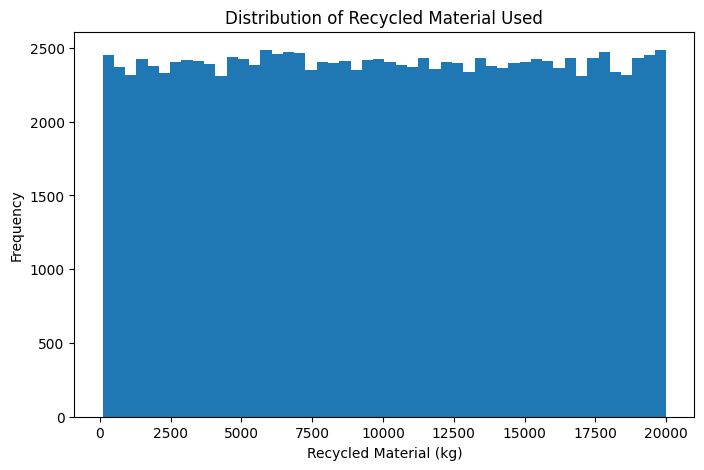

In [404]:
plt.figure(figsize=(8,5))
plt.hist(df['recycled_material_kg'], bins=50)
plt.xlabel("Recycled Material (kg)")
plt.ylabel("Frequency")
plt.title("Distribution of Recycled Material Used")
plt.show()

There is a Uniform spread in the distribution of Recycled Material Used. So there is balanced recycling across all facilities.

Stable Recycling Practices :

1. Facilities are consistently using roughly similar amounts of recycled material.

2. This indicates standardized recycling processes.

3. No major gaps or inconsistencies across facilities.

#### Circularity Score Distribution (KPI Target)
##### "circularity_score" = recycled_material_kg / (recycled_material_kg + raw_material_kg)

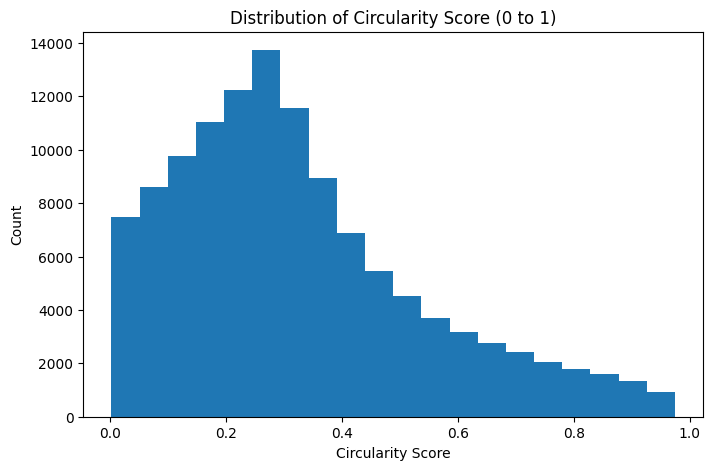

In [405]:
plt.figure(figsize=(8,5))
plt.hist(df['circularity_score'], bins=20)
plt.xlabel("Circularity Score")
plt.ylabel("Count")
plt.title("Distribution of Circularity Score (0 to 1)")
plt.show()

Right Skewed Distribution

Low scores (0.1–0.3): facility is not circular, high waste, low recycling.

Medium (0.4–0.6): making progress.

High (0.7+): strong recycling loops, efficient material recovery.

Most facilities are not circular yet :

1. They have low recycling rates.

2. They still depend heavily on virgin material.

3. Waste generation is likely high.

A few facilities are leading the circularity effort

The right tail (0.7–0.9) shows high-performing facilities.

They may:

1. Use advanced recovery/recycling systems

2. Have better process optimization

3. Have higher recycled material input

#### Combined Insights: Recycled Material Distribution vs Circularity Score

High Recycling Quantity but Low Overall Efficiency

Right skew in circularity score means :

Most facilities recycle, but not efficiently relative to their total material usage.

They might still generate high waste, low reclaim rates, or rely heavily on virgin materials.

#### Only a Few Facilities Operate as True Circular Systems

Since only a small portion of records achieve high scores:

Those facilities likely have better waste recovery, material reuse, and lower dependence on virgin inputs.

They close the loop rather than simply adding recycling as an extra step.

#### Classification Target – High Waste Flag Counts

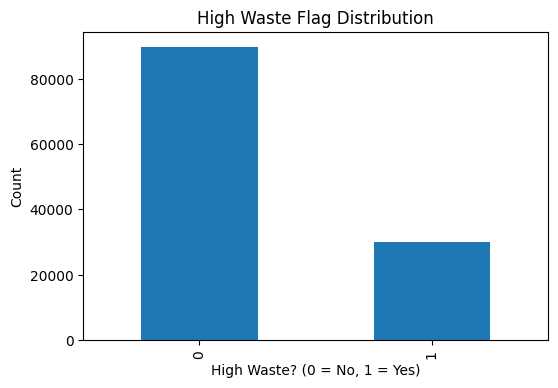

In [406]:
plt.figure(figsize=(6,4))
df['high_waste_flag'].value_counts().plot(kind='bar')
plt.xlabel("High Waste? (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("High Waste Flag Distribution")
plt.show()

df['high_waste_flag'] = (df['waste_kg'] > df['waste_kg'].quantile(0.75)).astype(int)

Although there is some imbalance, it is not severe.
The high-waste days still form a significant portion of observations.

Because high-waste incidents are less frequent but operationally critical,
we must optimize the model to improve recall for class 1.

Strategic methods chosen :

1. Stratified splits

2. Class-weighted models

3. ROC-AUC evaluation

#### High Waste Flag Rate per Region

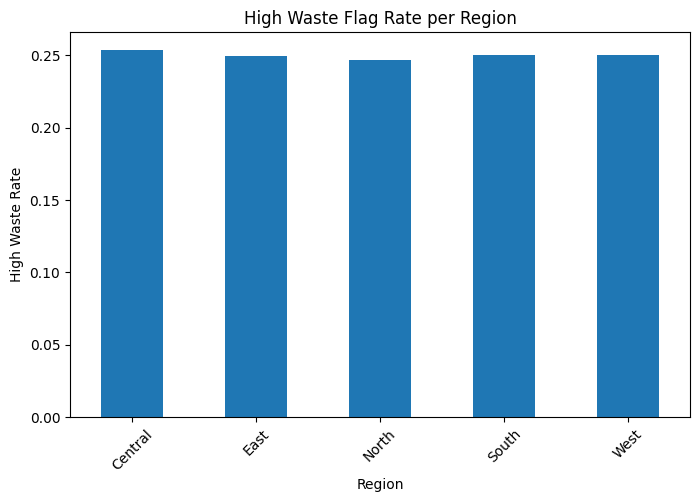

In [407]:
plt.figure(figsize=(8,5))
df.groupby('region')['high_waste_flag'].mean().plot(kind='bar')
plt.xlabel("Region")
plt.ylabel("High Waste Rate")
plt.title("High Waste Flag Rate per Region")
plt.xticks(rotation=45)
plt.show()

### Circularity Score by Product Type

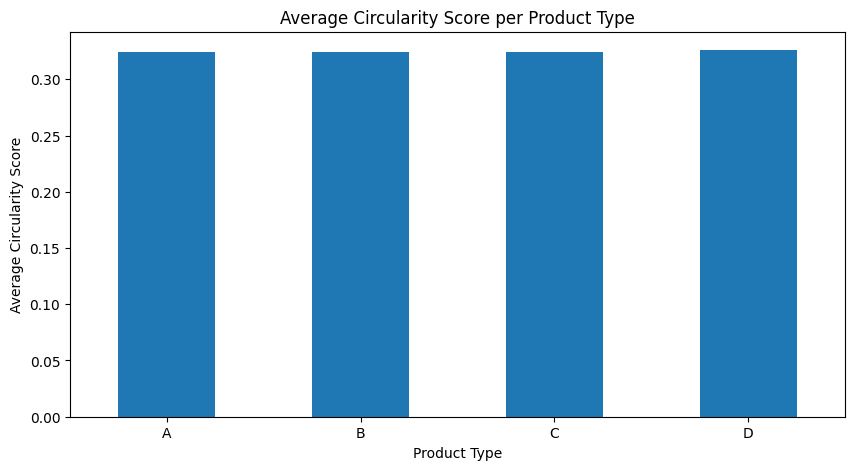

In [408]:
plt.figure(figsize=(10,5))
df.groupby('product_type')['circularity_score'].mean().plot(kind='bar')
plt.xlabel("Product Type")
plt.ylabel("Average Circularity Score")
plt.title("Average Circularity Score per Product Type")
plt.xticks(rotation=0)
plt.show()

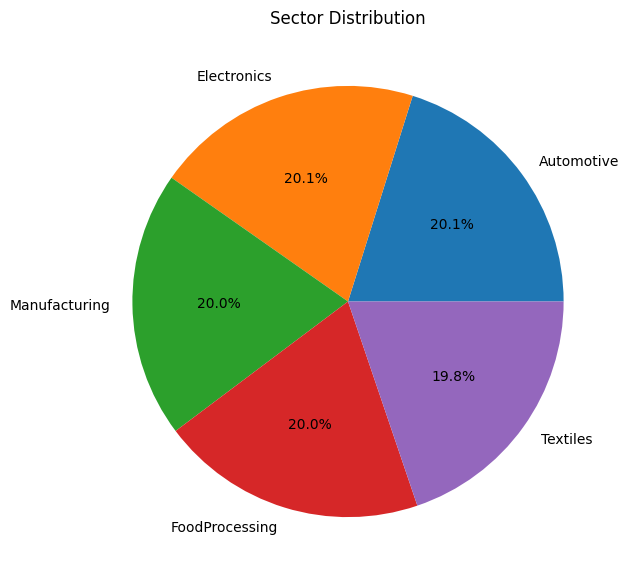

In [409]:
plt.figure(figsize=(7,7))
plt.pie(df['sector'].value_counts(), labels=df['sector'].value_counts().index,
        autopct='%1.1f%%')
plt.title("Sector Distribution")
plt.show()

In [410]:
df

,region,sector,product_type,production_volume_units,raw_material_kg,recycled_material_kg,waste_kg,energy_kwh,water_liters,machine_downtime_min,material_recovery_rate,circularity_score,high_waste_flag
0,Central,Manufacturing,D,465,37158.689666,327.993867,796.218119,1104.530248,52543.553197,252,0.477265,0.008750,0
1,Central,FoodProcessing,B,8563,38696.786139,18745.877072,186.479251,4756.519996,69309.583492,194,0.323071,0.326341,0
2,Central,Automotive,A,639,14004.562775,167.887756,3938.828066,4523.040420,18261.908937,470,0.747595,0.011846,1
3,North,Textiles,C,7739,1235.452834,18817.172636,4515.355530,3772.219308,23275.832404,242,0.642898,0.938389,1
4,East,Manufacturing,D,8512,25337.578331,10184.658514,3193.442861,5725.034528,33311.281041,13,0.770118,0.286712,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119997,Central,FoodProcessing,C,9461,34438.630730,9694.401086,3419.054118,9923.176865,85084.881118,191,0.772482,0.219663,0
119998,West,Textiles,B,2877,7237.806828,437.801570,753.284931,9377.988205,48155.165096,42,0.178297,0.057038,0
119999,South,FoodProcessing,B,4124,10290.508925,19653.040037,4964.124293,1612.387005,88661.667884,109,0.226163,0.656336,1
120000,North,FoodProcessing,A,5289,26585.062424,19489.647774,1961.407296,3396.678312,26881.971699,156,0.343119,0.423001,0


### Encoding

In [411]:
df["sector"].value_counts()

sector
Automotive        24177
Electronics       24142
Manufacturing     23986
FoodProcessing    23950
Textiles          23745
Name: count, dtype: int64

In [412]:
label_sector = LabelEncoder()
df["sector"] = label_sector.fit_transform(df["sector"])

In [413]:
df["sector"].value_counts()

sector
0    24177
1    24142
3    23986
2    23950
4    23745
Name: count, dtype: int64

#### Save Label Encoder into a Pickle file

In [414]:
with open('label_encoder_sector.pkl', 'wb') as f:
    pickle.dump(label_sector, f)

In [415]:
with open('label_encoder_sector.pkl', 'rb') as f:
    label_loaded = pickle.load(f)

In [416]:
new_value = ['Electronics']
encoded_value = label_loaded.transform(new_value)
print(encoded_value)

[1]


In [417]:
df["product_type"].value_counts()

product_type
C    30246
B    29984
D    29919
A    29851
Name: count, dtype: int64

As the "Product_type" column does not contain specific values or categories of products, So the types "ABCD" cannot be classified and we have to drop it even though it is relavent (if it contains actual product categories).

In [418]:
df["region"].value_counts()

region
South      24148
West       24028
Central    23990
East       23950
North      23884
Name: count, dtype: int64

As the "region" Column 

In [419]:
df.drop(columns=["product_type","region"],axis=1,inplace=True)